In [268]:
import pandas as pd
import geopandas as gpd
from cenpy import products
import matplotlib.pyplot as plt
import osmnx as ox
from datetime import datetime
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx
from shapely import wkt
import libpysal 
from libpysal.weights import Queen
import esda
from splot import esda as esdaplot

In [269]:
sci = pd.read_csv('county_county.tsv', sep = '\t', dtype=str)

In [270]:
sci['FIPS'] = sci.user_loc.astype(str)

In [271]:
sci.set_index('FIPS', inplace=True)

In [272]:
sci.head()

,user_loc,fr_loc,scaled_sci
FIPS,,,
01001,01001,01001,8946863
01001,01001,01003,101997
01001,01001,01005,134341
01001,01001,01007,254620
01001,01001,01009,67196


In [273]:
sci_fl = sci[sci['user_loc'].str.startswith('12')].reset_index(drop=True)
sci_ga = sci[sci['user_loc'].str.startswith('13')].reset_index(drop=True)
sci_sc = sci[sci['user_loc'].str.startswith('45')].reset_index(drop=True)
sci_nc = sci[sci['user_loc'].str.startswith('37')].reset_index(drop=True)
sci_md = sci[sci['user_loc'].str.startswith('24')].reset_index(drop=True)
sci_dc = sci[sci['user_loc'].str.startswith('11')].reset_index(drop=True)
sci_va = sci[sci['user_loc'].str.startswith('51')].reset_index(drop=True)
sci_de = sci[sci['user_loc'].str.startswith('10')].reset_index(drop=True)
sci_nj = sci[sci['user_loc'].str.startswith('34')].reset_index(drop=True)
sci_pa = sci[sci['user_loc'].str.startswith('42')].reset_index(drop=True)
sci_ny = sci[sci['user_loc'].str.startswith('36')].reset_index(drop=True)
sci_ct = sci[sci['user_loc'].str.startswith('09')].reset_index(drop=True)
sci_ri = sci[sci['user_loc'].str.startswith('44')].reset_index(drop=True)
sci_ma = sci[sci['user_loc'].str.startswith('25')].reset_index(drop=True)
sci_vt = sci[sci['user_loc'].str.startswith('50')].reset_index(drop=True)
sci_nh = sci[sci['user_loc'].str.startswith('33')].reset_index(drop=True)
sci_me = sci[sci['user_loc'].str.startswith('23')].reset_index(drop=True)

In [274]:
sci_fl.head()

,user_loc,fr_loc,scaled_sci
0,12001,01001,4373
1,12001,01003,5271
2,12001,01005,9323
3,12001,01007,2048
4,12001,01009,2003


In [275]:
fl =pd.read_csv('fl.csv')
ga =pd.read_csv('ga.csv')
sc =pd.read_csv('sc.csv')
nc =pd.read_csv('nc.csv')
md =pd.read_csv('md.csv')
dc = pd.read_csv('dc.csv')
va =pd.read_csv('va.csv')
de =pd.read_csv('de.csv')
nj =pd.read_csv('nj.csv')
pa =pd.read_csv('pa.csv')
ny =pd.read_csv('ny.csv')
ct =pd.read_csv('ct.csv')
ri =pd.read_csv('ri.csv')
ma =pd.read_csv('ma.csv')
vt =pd.read_csv('vt.csv')
nh =pd.read_csv('nh.csv')
me =pd.read_csv('me.csv')

In [276]:
states = [fl,
ga,
sc,
nc,
md,
dc,
va,
de,
nj,
pa,
ny,
ct,
ri,
ma,
vt,
nh,
me]

In [277]:
for state in states:
    state['GEOID'] = state['GEOID'].astype(str)

In [278]:
sci_fl = sci_fl.merge(fl, left_on='user_loc', right_on='GEOID')
sci_ga = sci_ga.merge(ga, left_on='user_loc', right_on='GEOID')
sci_sc = sci_sc.merge(sc, left_on='user_loc', right_on='GEOID')
sci_nc = sci_nc.merge(nc, left_on='user_loc', right_on='GEOID')
sci_md = sci_md.merge(md, left_on='user_loc', right_on='GEOID')
sci_dc = sci_dc.merge(dc, left_on='user_loc', right_on='GEOID')
sci_va = sci_va.merge(va, left_on='user_loc', right_on='GEOID')
sci_de = sci_de.merge(de, left_on='user_loc', right_on='GEOID')
sci_nj = sci_nj.merge(nj, left_on='user_loc', right_on='GEOID')
sci_pa = sci_pa.merge(pa, left_on='user_loc', right_on='GEOID')
sci_ny = sci_ny.merge(ny, left_on='user_loc', right_on='GEOID')
sci_ct = sci_ct.merge(ct, left_on='user_loc', right_on='GEOID')
sci_ri = sci_ri.merge(ri, left_on='user_loc', right_on='GEOID')
sci_ma = sci_ma.merge(ma, left_on='user_loc', right_on='GEOID')
sci_vt = sci_vt.merge(vt, left_on='user_loc', right_on='GEOID')
sci_nh = sci_nh.merge(nh, left_on='user_loc', right_on='GEOID')
sci_me = sci_me.merge(me, left_on='user_loc', right_on='GEOID')

In [279]:
states_sci = [sci_fl,
sci_ga,
sci_sc,
sci_nc,
sci_md,
sci_dc,
sci_va,
sci_de,
sci_nj,
sci_pa,
sci_ny,
sci_ct,
sci_ri,
sci_ma,
sci_vt,
sci_nh,
sci_me]

In [280]:
for state in states_sci:
    state['scaled_sci'] = state['scaled_sci'].astype(int)

In [281]:
sci_fl.head()

,user_loc,fr_loc,scaled_sci,Unnamed: 0,GEOID,geometry,NAME,state,county
0,12001,01001,4373,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1
1,12001,01003,5271,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1
2,12001,01005,9323,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1
3,12001,01007,2048,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1
4,12001,01009,2003,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1


In [282]:
fl.head()

,Unnamed: 0,GEOID,geometry,NAME,state,county
0,0,12051,"POLYGON ((-9036152.5 3094536.27, -9036017.3599...","Hendry County, Florida",12,51
1,1,12121,"POLYGON ((-9216673.859999999 3544771.46, -9216...","Suwannee County, Florida",12,121
2,2,12103,"POLYGON ((-9194936.390000001 3240944.92, -9194...","Pinellas County, Florida",12,103
3,3,12075,"POLYGON ((-9187738.59 3402998.47, -9187738.029...","Levy County, Florida",12,75
4,4,12081,"POLYGON ((-9186613.15 3204342.72, -9185918.51 ...","Manatee County, Florida",12,81


In [283]:
type(fl.GEOID[0])

str

In [284]:
states_all = pd.concat(states)

In [285]:
states_all.set_index('Unnamed: 0', inplace=True)

In [286]:
states_all['geometry'] = states_all['geometry'].apply(wkt.loads)

In [287]:
states_all = gpd.GeoDataFrame(states_all, crs='epsg:4326', geometry='geometry')

In [288]:
sci_all = pd.concat(states_sci)

In [289]:
sci_all.head()

,user_loc,fr_loc,scaled_sci,Unnamed: 0,GEOID,geometry,NAME,state,county,tract
0,12001,01001,4373,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1,NaN
1,12001,01003,5271,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1,NaN
2,12001,01005,9323,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1,NaN
3,12001,01007,2048,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1,NaN
4,12001,01009,2003,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1,NaN


<AxesSubplot:>

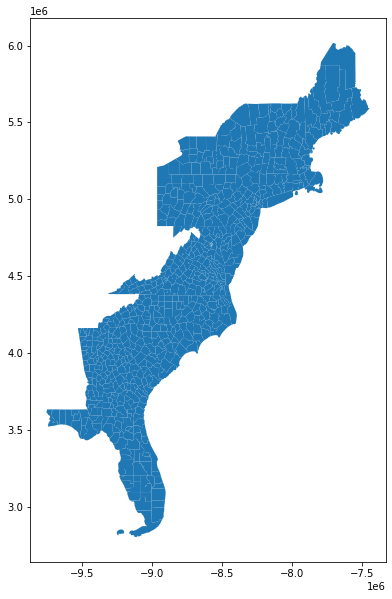

In [290]:
states_all.plot(figsize=(10,10))

In [291]:
#fl_total = sci_fl.groupby(['GEOID'], as_index=False)['scaled_sci'].agg('sum')

In [292]:
fl_total = sci_fl.groupby(['GEOID'])

In [293]:
fl_total = sci_fl.groupby(['GEOID'])[['scaled_sci']].sum().rename(columns={'scaled_sci':'total_sci'})

In [294]:
fl_total

,total_sci
GEOID,
12001,17411219
12003,55581380
12005,25091531
12007,56477285
12009,10300146
...,...
12125,78711675
12127,11267961
12129,46799743


In [295]:
sci_total = sci_all.groupby(['GEOID'], as_index=False)[['scaled_sci']].sum().rename(columns={'scaled_sci':'total_sci'})

In [296]:
sci_total

,GEOID,total_sci
0,10001,15152426
1,10003,9086751
2,10005,13636253
3,12001,17411219
4,12003,55581380
...,...,...
736,51800,32782598
737,51810,16416822
738,51820,44634952
739,51830,23011671


In [297]:
sci_total = sci_all.merge(sci_total)

In [298]:
sci_total.drop_duplicates(subset='GEOID', inplace=True)

In [299]:
del(sci_total['scaled_sci'])

In [300]:
sci_total

,user_loc,fr_loc,Unnamed: 0,GEOID,geometry,NAME,state,county,tract,total_sci
0,12001,01001,37,12001,"POLYGON ((-9133796.609999999 3466293.28, -9133...","Alachua County, Florida",12,1,NaN,17411219
3227,12003,01001,6,12003,"POLYGON ((-9160148.609999999 3521781.47, -9160...","Baker County, Florida",12,3,NaN,55581380
6454,12005,01001,59,12005,"POLYGON ((-9505533.02 3535595.76, -9505530.800...","Bay County, Florida",12,5,NaN,25091531
9681,12007,01001,16,12007,"POLYGON ((-9148682.699999999 3512145.17, -9148...","Bradford County, Florida",12,7,NaN,56477285
12908,12009,01001,9,12009,"POLYGON ((-8959168.17 3254261.11, -8959122.08 ...","Brevard County, Florida",12,9,NaN,10300146
...,...,...,...,...,...,...,...,...,...,...
2375072,23023,01001,14,23023,"POLYGON ((-7763814.58 5448981.54, -7763798.1 5...","Sagadahoc County, Maine",23,23,NaN,23095352
2378299,23025,01001,5,23025,"POLYGON ((-7712919.64 5591343.61, -7712905.28 ...","Somerset County, Maine",23,25,NaN,23138820
2381526,23027,01001,1,23027,"POLYGON ((-7682621.93 5569999.31, -7682515.28 ...","Waldo County, Maine",23,27,NaN,25492912
2384753,23029,01001,11,23029,"POLYGON ((-7515808.45 5530609.4, -7516256.17 5...","Washington County, Maine",23,29,NaN,38736775


In [301]:
sci_total['geometry'] = sci_total['geometry'].apply(wkt.loads)

In [302]:
sci_total = gpd.GeoDataFrame(sci_total, crs='epsg:4326', geometry='geometry')

<AxesSubplot:>

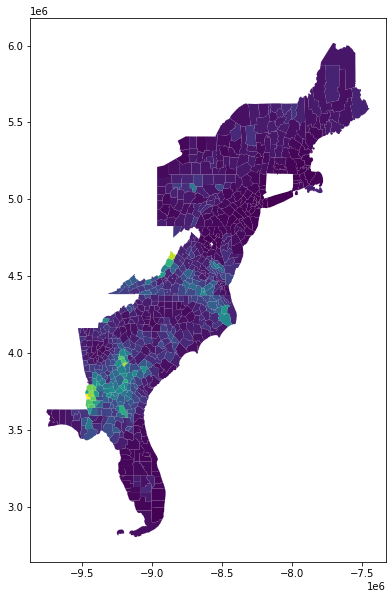

In [303]:

sci_total.plot('total_sci', figsize=(10,10))

In [304]:
qW = Queen.from_dataframe(sci_total)

In [305]:
y=sci_total['total_sci']

In [306]:
li = esda.moran.Moran_Local(y, qW)

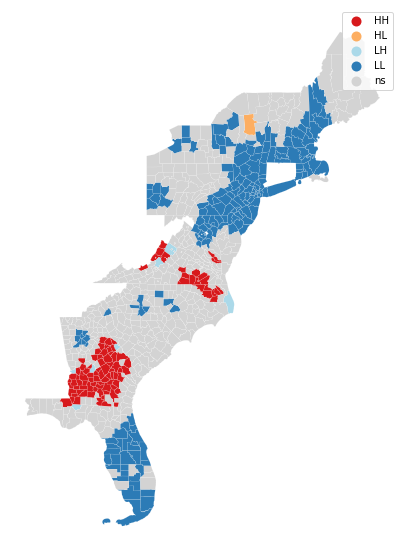

In [307]:
esdaplot.lisa_cluster(li, sci_total, figsize=(10,10));

<Figure size 1080x720 with 0 Axes>

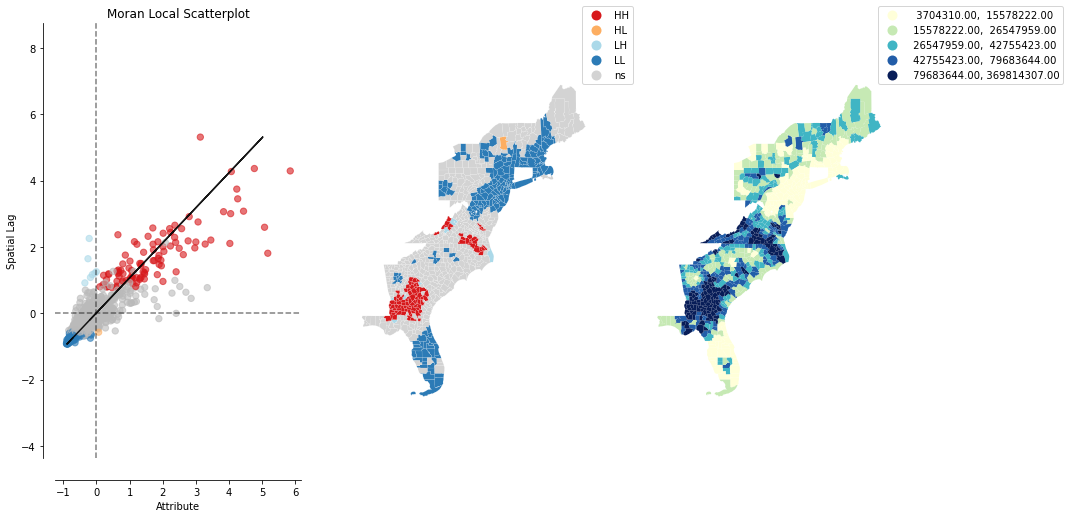

In [308]:
plt.figure(figsize=(15,10))
esdaplot.plot_local_autocorrelation(li, sci_total, 'total_sci', figsize=(15,8));

<AxesSubplot:>

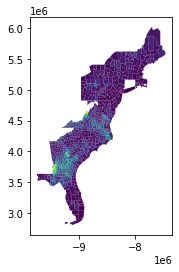

In [309]:
#states_all.to_csv('states_all.csv')

In [319]:
#states_all.to_file('states_all.shp')